# Pair Classifier Test Metrics

Fig. 4 plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## summary stats table

In [2]:
def combine_stats(list_of_paths):
    # read all results files and combine
    df = pd.concat([pd.read_csv(path) for path in list_of_paths]).reset_index(drop=True)

    # get means and errors
    means = df.groupby("model_name").mean()
    sem = df.groupby("model_name").sem()

    # combine in a readable table format
    combined = means.copy()
    for i in means.index:
        for j in [col for col in means.columns if "test" in col]:
            combined.loc[i,j] = f"{str(round(means.loc[i,j], 4))} (\xB1 {str(round(sem.loc[i,j], 4))})"
            # combined.loc[i,j] = f"{str(round(means.loc[i,j]*100, 2))} (\xB1 {str(round(sem.loc[i,j]*100, 2))})"

    return combined

In [3]:
# replace with actual paths to summary results
combine_stats(["./results/uniform-250k_itr-tests_50ep_pairs-C.csv", 
               "./results/uniform-350k_itr-tests_50ep_pairs-C.csv",
               "./results/preferential-250k_itr-tests_50ep_pairs-C.csv"])

,itr,test_loss,test_accuracy,test_precision,test_recall,test_f1,test_auc,test_aupr,test_mcc
model_name,,,,,,,,,
preferential-250k,2.0,0.6073 (± 0.0014),0.6569 (± 0.0017),0.7948 (± 0.0037),0.4229 (± 0.002),0.5521 (± 0.0022),0.7088 (± 0.0018),0.7454 (± 0.002),0.355 (± 0.004)
uniform-250k,2.0,0.6133 (± 0.0013),0.652 (± 0.0024),0.7715 (± 0.0054),0.4321 (± 0.0025),0.5539 (± 0.0028),0.6981 (± 0.0022),0.7335 (± 0.0028),0.3386 (± 0.0057)
uniform-350k,2.0,0.6181 (± 0.0009),0.6485 (± 0.0014),0.7541 (± 0.0023),0.4409 (± 0.0026),0.5564 (± 0.0023),0.6981 (± 0.0018),0.7301 (± 0.0017),0.3266 (± 0.003)


In [4]:
# replace with actual paths to summary results
combine_stats(["./results/uniform-250k_itr-tests_50ep_pairs-D.csv", 
               "./results/uniform-350k_itr-tests_50ep_pairs-D.csv",
               "./results/preferential-250k_itr-tests_50ep_pairs-D.csv"])

,itr,test_loss,test_accuracy,test_precision,test_recall,test_f1,test_auc,test_aupr,test_mcc
model_name,,,,,,,,,
preferential-250k,2.0,0.6415 (± 0.0004),0.6209 (± 0.001),0.6364 (± 0.0019),0.564 (± 0.0045),0.5979 (± 0.0021),0.6758 (± 0.001),0.6723 (± 0.001),0.2433 (± 0.0021)
uniform-250k,2.0,0.6524 (± 0.001),0.6059 (± 0.0018),0.6241 (± 0.0021),0.5324 (± 0.0042),0.5746 (± 0.0028),0.6567 (± 0.0022),0.6524 (± 0.0017),0.2141 (± 0.0036)
uniform-350k,2.0,0.6483 (± 0.0007),0.6118 (± 0.0019),0.6244 (± 0.0017),0.5612 (± 0.0042),0.5911 (± 0.0029),0.6635 (± 0.0019),0.6578 (± 0.0014),0.2248 (± 0.0037)


## classifier performance over training

test set eval data is exported from [weights and biases](wandb.ai) by downloading from the wandb project (with `x=train/epoch` and `y=eval/accuracy` or `y=eval/aupr`)

can also access through trainer logs `trainer.state.log_history` (if the trainer state is saved)

In [5]:
# for renaming the models from their job_id abbreviations in the column names
def model_name(col):
    if "preferential" in col:
        return "Preferential-250k"
    elif ("uniform" in col) and ("250k" in col):
        return "Uniform-250k"
    else:
        return "Uniform-350k"

model_order = ["Uniform-250k", "Uniform-350k", "Preferential-250k"]
color_order = [sns.color_palette("Set3")[4], sns.color_palette("Set3")[0], sns.color_palette("Set3")[5]]

In [6]:
# download test metrics data from wandb (or access via trainer logs) and replace with actual paths
acc1 = pd.read_csv("acc_pair-C.csv") 
acc1 = acc1.iloc[:, [0] + list(range(4, acc1.shape[1], 6))]
acc2 = pd.read_csv("acc_pair-D.csv")
acc2 = acc2.iloc[:, [0] + list(range(4, acc2.shape[1], 6))]
acc = pd.merge(acc1, acc2, how="outer", on="train/epoch")

aupr1 = pd.read_csv("aupr_pair-C.csv") 
aupr1 = aupr1.iloc[:, [0] + list(range(4, aupr1.shape[1], 6))]
aupr2 = pd.read_csv("aupr_pair-D.csv")
aupr2 = aupr2.iloc[:, [0] + list(range(4, aupr2.shape[1], 6))]
aupr = pd.merge(aupr1, aupr2, how="outer", on="train/epoch")

In [7]:
# pivot table for plotting
plot_data = []

for column in acc.iloc[:, 1:]:
    aupr_col = column.replace("accuracy", "aupr")
    test = "C" if "pairs-C" in column else "D"
    model = model_name(column) 
    pivoted = list(zip(acc["train/epoch"], acc[column], aupr[aupr_col], [model]*len(acc["train/epoch"]), [test]*len(acc["train/epoch"])))
    plot_data.extend(pivoted)

data = pd.DataFrame(plot_data, columns=["Epoch", "Accuracy", "AUPR", "Base Model", "Dataset"])
data

,Epoch,Accuracy,AUPR,Base Model,Dataset
0,2,0.581239,0.618447,Uniform-350k,C
1,4,0.603669,0.650312,Uniform-350k,C
2,6,0.610298,0.665997,Uniform-350k,C
3,8,0.624634,0.679531,Uniform-350k,C
4,10,0.628179,0.680340,Uniform-350k,C
...,...,...,...,...,...
745,42,0.608373,0.652847,Uniform-250k,D
746,44,0.609736,0.654200,Uniform-250k,D
747,46,0.609191,0.654801,Uniform-250k,D
748,48,0.604350,0.654156,Uniform-250k,D


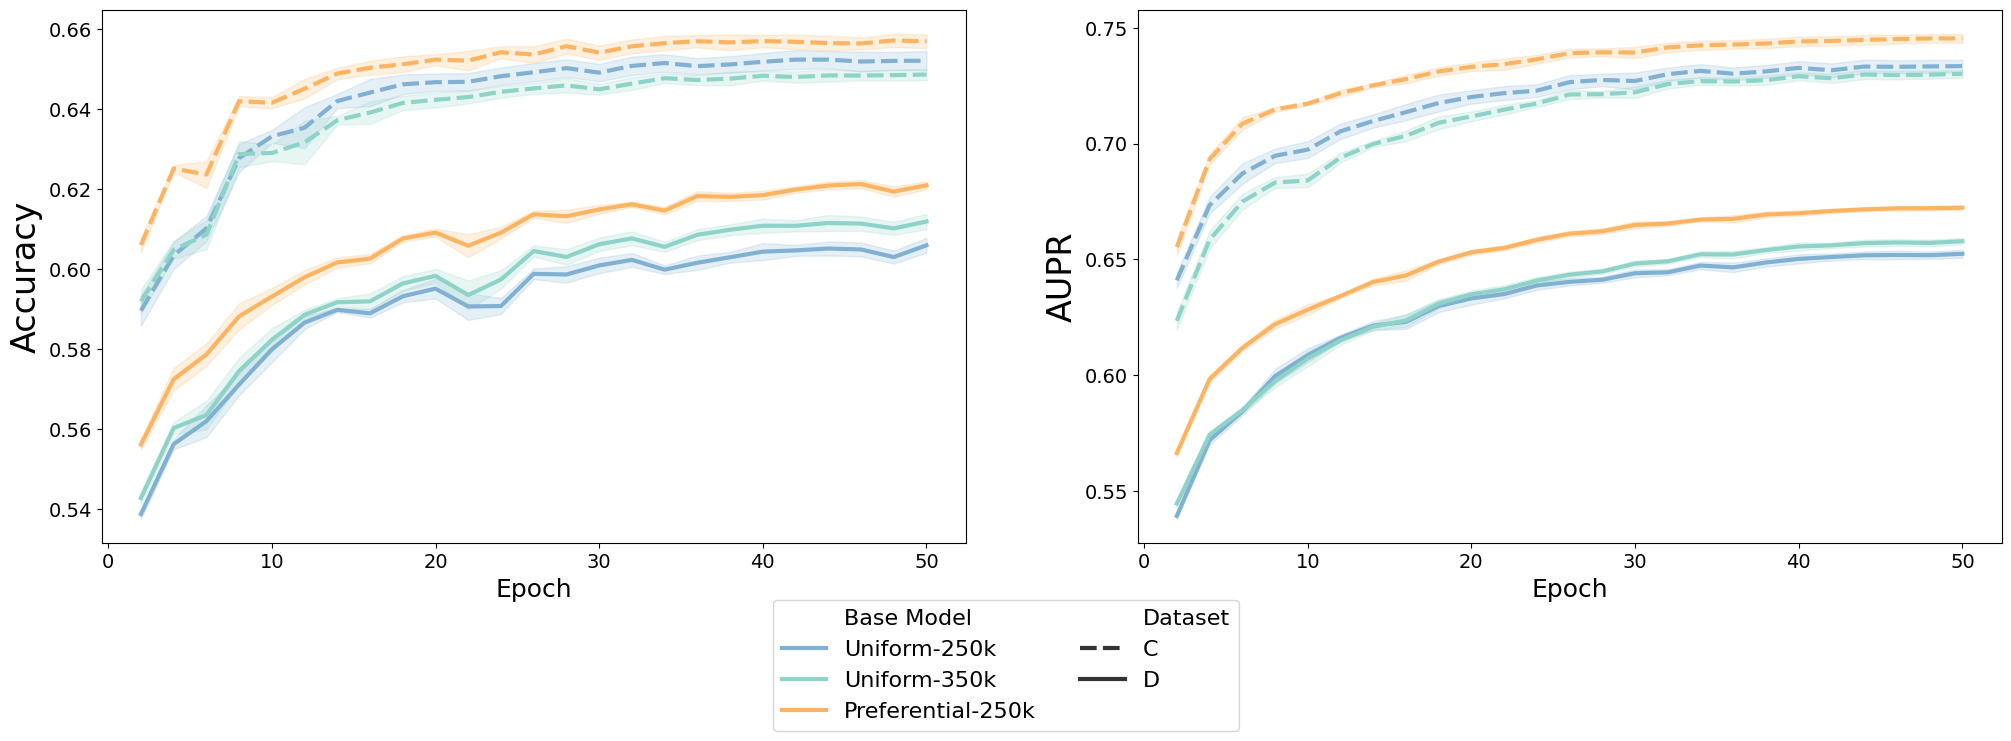

In [8]:
fig, ax = plt.subplot_mosaic([['a.', 'b.']],
                              layout='constrained',
                              figsize=(20, 6),
                              gridspec_kw={"wspace": 0.08, "hspace": 0.08},
                             )
plots = {
    "a.": "Accuracy",
    "b.": "AUPR",
}

for label, metric in plots.items():
    sns.lineplot(data=data, x="Epoch", y=metric, 
                 hue="Base Model", hue_order=model_order,
                 style="Dataset", style_order=["D", "C"],
                 errorbar=("se"),
                 palette=color_order, 
                 linewidth=3,
                 ax=ax[label])
    # ax[label].legend(loc="lower right", fontsize=14, title_fontsize=16)
    ax[label].get_legend().set_visible(False)
    ax[label].set_xlabel("Epoch", fontsize=18)
    ax[label].set_ylabel(metric, fontsize=24)
    ax[label].xaxis.set_tick_params(labelsize = 14)
    ax[label].yaxis.set_tick_params(labelsize = 14)
    # ax[label].annotate(label, xy=(-0.1, 1.02), xycoords="axes fraction", 
    #                    fontsize=20, weight="bold")

# single legend for whole plot
handles, labels = ax["a."].get_legend_handles_labels()
# switch order of datasets for legend but maintain dashed for test set and solid for memory
labels[5], labels[6] = labels[6], labels[5]
handles[5], handles[6] = handles[6], handles[5]

fig.legend(handles, labels, 
           loc="center", 
           bbox_to_anchor=(0.5, -0.1),
           fontsize=16,
           ncols=2)

# plt.savefig("pair_acc_aupr.svg", bbox_inches='tight')

## pair breakdown for dataset C

hypothesis: improved performance on dataset C is due to the models identifying chains as either germline (unmutated) or mutated, which suggests a shuffled pair.

by separating these test predictions by whether the heavy and light chains are of the same type (either both unmutated or both mutated) versus when only one of the two chains are mutated (the other is unmutated), we can test this hypothesis.

note: this requires test-set annotations (for mutation counts) and dataset C

In [9]:
%%bash

# download test set annotations if they don't already exist
if [ ! -e "../data/B_test-set_annotations.csv" ]; then
    curl -o 'test-set_annotations.tar.gz' -L 'https://zenodo.org/records/14019655/files/test-set_annotations.tar.gz?download=1'
    tar xzvf 'test-set_annotations.tar.gz' -C ../data
    rm 'test-set_annotations.tar.gz'
fi

# native vs shuffled pair datasets should already be downloaded (in `1-split_dataset.ipynb`)

In [10]:
# separate ids for each chain in shuffled dataset C
data_C = pd.read_csv("../data/C_native-0_shuffled-1.csv")
data_C["h_id"] = data_C["name"].apply(lambda name: name.split("|")[0])
data_C["l_id"] = data_C["name"].apply(lambda name: name.split("|")[1])

# count mutations on each chain
test_data = pd.read_csv("../data/B_test-set_annotations.csv")
test_data = test_data.loc[:, ["sequence_id", "sequence_aa", "v_identity_aa", "v_mutations_aa", "locus"]]

counts = []
for row in test_data["v_mutations_aa"]:
    if isinstance(row, str):
        counts.append(row.count(":"))
    else:
        counts.append(0)

test_data["v_mutation_count_aa"] = pd.Series(counts, name="v_mutation_count_aa")
test_data

,sequence_id,sequence_aa,v_identity_aa,v_mutations_aa,locus,v_mutation_count_aa
0,00042cf7-cc92-aa6f-ca45-fe5c83987ffb,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...,1.0,NaN,IGH,0
1,00042cf7-cc92-aa6f-ca45-fe5c83987ffb,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNYVYWYQQLPGTAPK...,1.0,NaN,IGL,0
2,00044d0a-d75a-3f0e-292c-00328712873e,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLE...,1.0,NaN,IGH,0
3,00044d0a-d75a-3f0e-292c-00328712873e,DIQMTQSPSSLSASVGDRVTITCRASQGISNYLAWYQQKPGKVPKL...,1.0,NaN,IGK,0
4,000d3462-cfa3-b4bd-6ad1-25e25a5af361,SSELTQDPAVSVALGQTVRITCQGDSLRSYYASWYQQKPGQAPVLV...,1.0,NaN,IGL,0
...,...,...,...,...,...,...
129809,fff75fc1-4dc1-d528-430a-e64f2d42c359,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,1.0,NaN,IGK,0
129810,fff76bd6-1d6a-d595-7477-382a9d26b164,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,1.0,NaN,IGH,0
129811,fff76bd6-1d6a-d595-7477-382a9d26b164,QSALTQPRSVSGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...,1.0,NaN,IGL,0
129812,fffb9db6-244d-0288-df49-2084a8eebd74,DIQMTQSPSSLSASVGDRVTITCQASQDISNYLNWYQQKPGKAPKL...,1.0,NaN,IGK,0


In [11]:
# to add mutation counts
heavy_all = test_data[test_data["locus"] == "IGH"]
light_all = test_data[test_data["locus"] != "IGH"]

heavy_C = data_C.loc[:, ["name", "h_id", "h_sequence", "label"]].rename(columns={"h_id": "sequence_id", "h_sequence": "sequence_aa"})
heavy_C = heavy_C.merge(heavy_all, on=["sequence_id", "sequence_aa"])
heavy_C = heavy_C.drop(columns=["v_identity_aa", "v_mutations_aa", "locus"]).rename(columns={"sequence_id":"h_id", "sequence_aa":"h_sequence", "v_mutation_count_aa":"h_mutation_count"})

light_C = data_C.loc[:, ["name", "l_id", "l_sequence", "label"]].rename(columns={"l_id": "sequence_id", "l_sequence": "sequence_aa"})
light_C = light_C.merge(light_all, on=["sequence_id", "sequence_aa"])
light_C = light_C.drop(columns=["v_identity_aa", "v_mutations_aa", "locus"]).rename(columns={"sequence_id":"l_id", "sequence_aa":"l_sequence", "v_mutation_count_aa":"l_mutation_count"})

data_C_mut = heavy_C.merge(light_C, on=["name", "label"]).loc[:, ["h_sequence", "h_mutation_count", "l_sequence", "l_mutation_count"]]
data_C_mut

,h_sequence,h_mutation_count,l_sequence,l_mutation_count
0,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,0,NFMLTQPHSVSESPGKTVTISCTRSSGSIASNYVQWYQQRPGSAPT...,1
1,EVQLVQSGAEVKKPGESLKISCKGSGYSFTSYWIGWVRQMPGKGLE...,1,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,0
2,QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPPGKGLE...,0,QSALTQPASVSGSPGQSITISCTGTSSDVGSYNLVSWYQQHPGKAP...,0
3,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,0,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...,0
4,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,0,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNTVNWYQQLPGTAPK...,0
...,...,...,...,...
64869,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,0,DIVMTQSPLSLAVTPGEPASISCRSSQSLVRSDGHSYLDWYLQKPG...,14
64870,EVQLLESGGGLVQPGGSLRLSCAASGFTFSSYAMNWVRQAPGKGLE...,6,QSALTQPASVSGSPGQSITISCTGTSTDVGRYNLVSWYQQHPGKAP...,8
64871,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,0,SYELTQPPSVSVSPGQTARITCSGDALPKKYAYWYQQKSGQAPVLV...,0
64872,QLQLQESGPGLVKPSETLSLTCTVSGGSISSSSYYWSWIRQPPGKG...,2,QSALTQPRSVSGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...,1


In [12]:
# dict to load test data with predicitons
pair_preds = [f"./results/data-C_predictions_itr{i}.csv" for i in range(5)]
pair_preds

['./results/data-C_predictions_itr0.csv',
 './results/data-C_predictions_itr1.csv',
 './results/data-C_predictions_itr2.csv',
 './results/data-C_predictions_itr3.csv',
 './results/data-C_predictions_itr4.csv']

In [13]:
# for each iteration, find the predictive accuracies of all 3 models separated by types of chain pairings
# since AbLMs can differentiate between naïve and mutated sequences, we expect it to be easier for models to recognize shuffled pairs when only one of the two chains is mutated --> higher accuracy on pairs with only 1 mutated chain

pairs_types_accs = []
for itr in range(len(pair_preds)):

    # load data and merge with mutation counts
    test_data = pd.read_csv(pair_preds[itr])
    test_data = test_data.merge(data_C_mut, on=["h_sequence", "l_sequence"], how="left")

    # different splits of the test dataset based on the mutation count of the chain pairs (both classes)
    sames = test_data[((test_data["h_mutation_count"] == 0) & (test_data["l_mutation_count"] == 0)) |
                      ((test_data["h_mutation_count"] != 0) & (test_data["l_mutation_count"] != 0))]
    diffs = test_data[((test_data["h_mutation_count"] != 0) & (test_data["l_mutation_count"] == 0)) |
                      ((test_data["h_mutation_count"] == 0) & (test_data["l_mutation_count"] != 0))]

    datasets = {
        "Same": sames,
        "Different": diffs,
    }

    models = ["uniform_250k", "uniform_350k", "preferential_250k"]

    # calculate accuracies
    for model in models:
        col_name = f"{model}_prediction"

        for name, pair_df in datasets.items():
            cm = pd.crosstab(pair_df["label"], pair_df[col_name])
            pair_acc = np.diag(cm).sum() / cm.to_numpy().sum()
            pairs_types_accs.append({
                "itr": itr,
                "model": model_name(model),
                "pair_type": name,
                "acc": pair_acc,
            })

pair_accs_df = pd.DataFrame(pairs_types_accs)
pair_accs_df.groupby(["pair_type", "model"]).mean()

itr       acc
pair_type model                           
Different Preferential-250k  2.0  0.787594
          Uniform-250k       2.0  0.792549
          Uniform-350k       2.0  0.790512
Same      Preferential-250k  2.0  0.606678
          Uniform-250k       2.0  0.598006
          Uniform-350k       2.0  0.594077

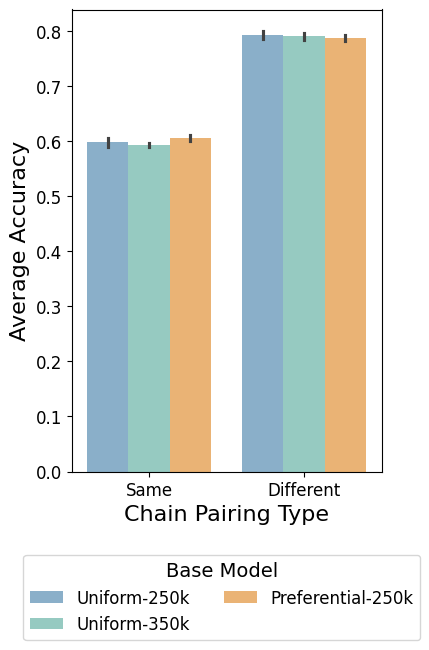

In [14]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.barplot(data=pair_accs_df,
            x="pair_type", y="acc", 
            hue="model", hue_order=model_order, palette=color_order,
            errorbar="sd",
           )
ax.get_legend().set_visible(False)
ax.set_xlabel("Chain Pairing Type", fontsize=16)
ax.set_ylabel("Average Accuracy", fontsize=16)
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, 
           loc="center", 
           title="Base Model",
           bbox_to_anchor=(0.5, -0.1),
           fontsize=12, title_fontsize=14,
           ncols=2)

# plt.savefig("pair_classifier_separated.svg", bbox_inches='tight')